Table of Content:

* [1.univariate analysis](#uni)
    * [numerical variables](#uni-nume)
    * [categorical variables](#uni-cate)
* [2.bivariate analysis](#bi)
    * [numerical variables](#bi-nume)
    * [categorical variables](#bi-cate)
* [3.correlation analysis](#corr)  

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

import os
if not os.path.exists("figs"): os.makedirs("figs")
if not os.path.exists("figs/univariate_analysis"): os.makedirs("figs/univariate_analysis")
if not os.path.exists("figs/bivariate_analysis"): os.makedirs("figs/bivariate_analysis")

In [6]:
df=pd.read_csv('final_sample_uni.csv') 

/Users/jingsixu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,25,28,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
df.shape

(254000, 61)

In [13]:
df.head(10)

,loan_id,orig_loan_term,fico,ocltv,dti,oltv,x_period,loan_age,cd_msa,state,...,change_unem2,pchange_unem,curr_unem,Diff_HPI_vol,d_prob_neq,rel_median_orig_upb,rel_mean_orig_upb,d90_status,d90_qstatus,d90_flag
0,100031959830,360,782,80,46,80,09/01/00,1,0.0,SC,...,-0.1,-2.631579,3.7,0.040538,0,128.181818,120.479505,0,0,0
1,100040303714,360,742,90,39,90,06/01/08,2,12060.0,GA,...,0.9,9.259259,5.9,0.041268,0,38.227147,34.694230,0,0,0
2,100041511703,360,785,80,35,80,12/01/10,0,14860.0,CT,...,0.2,1.086957,9.3,0.036165,0,230.962343,208.906934,0,0,0
3,100045198012,360,789,71,39,71,09/01/07,3,41700.0,TX,...,0.0,2.380952,4.3,0.042010,0,37.588652,32.302965,0,0,0
4,100055625380,360,798,80,43,80,09/01/10,0,41860.0,CA,...,-0.1,0.000000,12.2,0.039446,0,118.750000,111.648448,0,0,0
5,100061692731,360,669,80,28,80,09/01/11,2,16980.0,IL,...,0.6,1.010101,10.0,0.037847,0,100.000000,90.102406,0,0,0
6,100063963595,360,802,39,36,39,06/01/10,1,36220.0,TX,...,-0.3,-3.614458,8.0,0.042010,0,18.750000,16.526112,0,0,0
7,100074467951,360,651,71,26,71,12/01/07,1,0.0,WA,...,0.1,-2.083333,4.7,0.036200,0,63.133641,60.465757,0,0,0
8,100136775358,360,696,72,30,72,12/01/00,2,39900.0,NV,...,0.5,6.976744,4.6,0.034458,0,147.328244,143.615339,0,0,0
9,100137861518,360,813,75,37,75,09/01/11,1,19660.0,FL,...,-0.7,-4.901961,9.7,0.043557,0,165.333333,144.463401,0,0,0


<a id="uni"></a>
###  univariate analysis

<a id="uni-nume"></a>
#### numerical variables

fico
mean is:  731.47
std is:  54.97
min is:  416
max is:  850


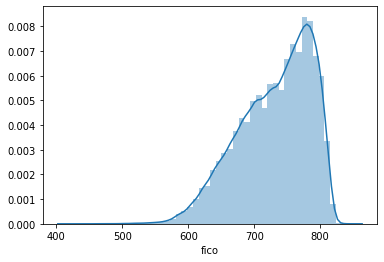


dti
mean is:  34.94
std is:  11.63
min is:  1
max is:  65


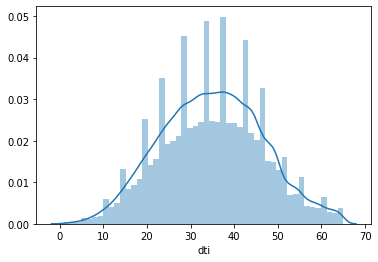


ocltv
mean is:  74.81
std is:  16.28
min is:  6
max is:  182


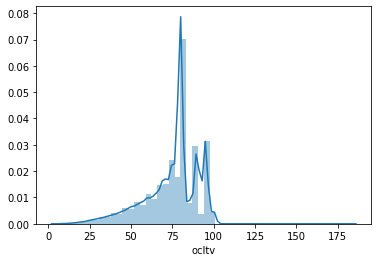


oltv
mean is:  73.39
std is:  15.82
min is:  6
max is:  104


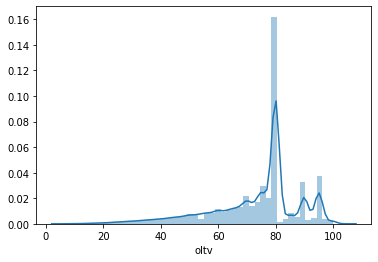


orig_upb
mean is:  186259.68
std is:  102031.23
min is:  9000
max is:  990000


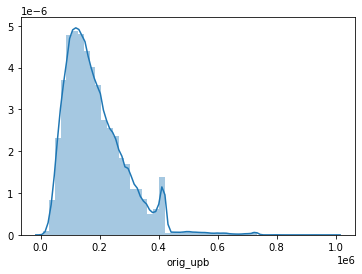


rel_median_orig_upb
mean is:  108.02
std is:  49.54
min is:  6.6964285714
max is:  432.9588015


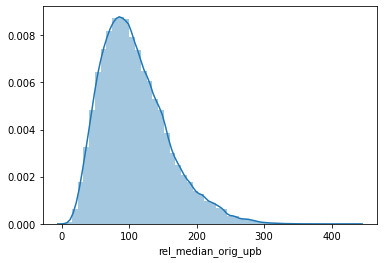


orig_rt
mean is:  6.07
std is:  1.02
min is:  3.25
max is:  10.875


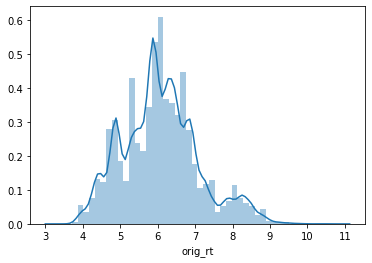


sato
mean is:  0.07
std is:  0.39
min is:  -2.666153846
max is:  3.0042307692000003


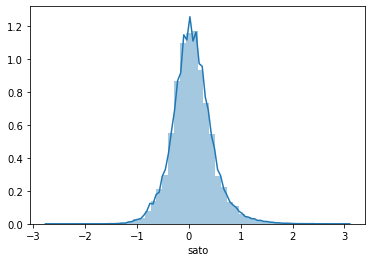

In [21]:
# numerical variables
continous_cols = ['fico', 'dti', 'ocltv', 'oltv', 'orig_upb', 
                  'rel_median_orig_upb', 'orig_rt', 'sato']

for col in continous_cols:
    print(col)
    print("mean is: ", df[col].mean().round(2))
    print("std is: ", df[col].std().round(2))
    print("min is: ", df[col].min())
    print("max is: ", df[col].max())
    sns.distplot(df[col], label = "univariate analysis on: " + col)
    #plt.savefig("figs/univariate_analysis/" + col + ".png")
    plt.show()
    print()

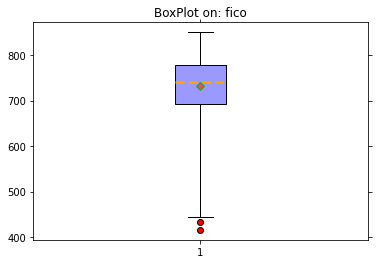

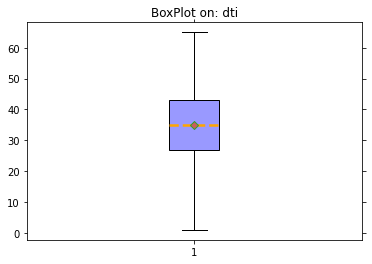

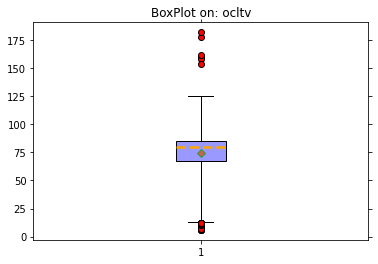

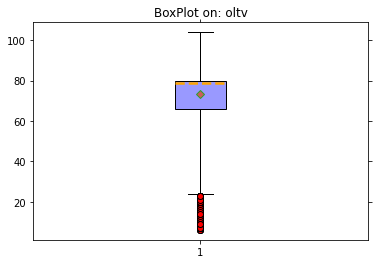

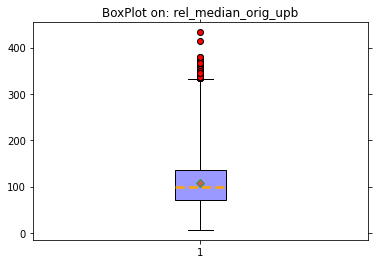

In [79]:
continous_cols_2 = ['fico', 'dti', 'ocltv', 'oltv', 'rel_median_orig_upb']
for col in continous_cols_2:
    plt.boxplot(x = df[col],
                whis = 3,# set extreme ourlier x > Q3+3(Q3-Q1) & X < Q1-3(Q3-Q1)
                patch_artist=True, 
                showmeans=True, # mean: show with point
                boxprops = {'color':'black','facecolor':'#9999ff'}, #set box features
                flierprops = {'marker':'o','markerfacecolor':'red','color':'black'}, # outlier: show with o
                meanprops = {'marker':'D','markerfacecolor':'indianred'}, 
                medianprops = {'linestyle':'--', 'linewidth':2.5, 'color':'orange'}) # medium: show with line
    plt.tick_params(top='off', right='off')
    plt.title("BoxPlot on: " + col )
    plt.show()

<a id="uni-cate"></a>
#### categorical variables

d90_flag


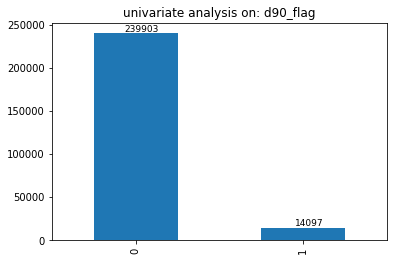


num_unit


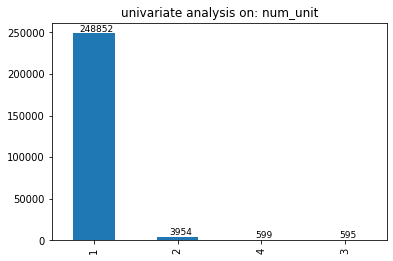


cnt_borr


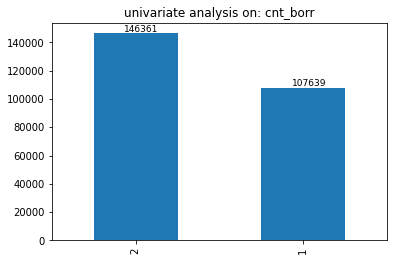


flag_fthb


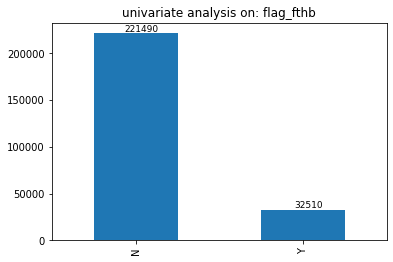


occpy_sts


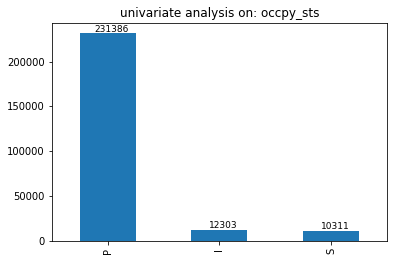


channel


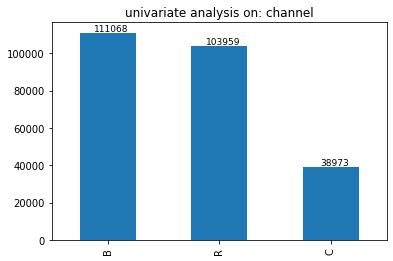


prop_type


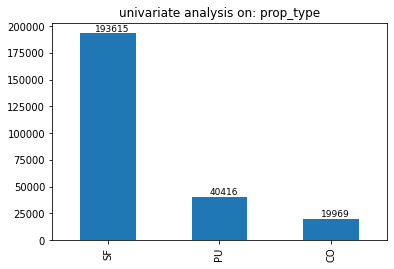


loan_purpose


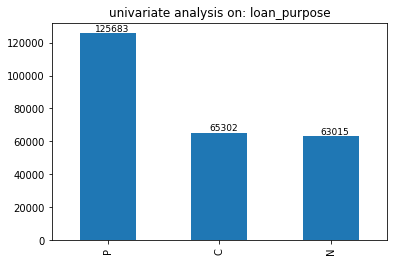

In [61]:
# categorical variables
categorical_columns = ['d90_flag',
                     'num_unit',
                     'cnt_borr',
                     'flag_fthb', 
                     'occpy_sts',
                     'channel',
                     'prop_type',
                     'loan_purpose']


for col in categorical_columns:
    print(col)
    df[col].value_counts().plot(kind = "bar", title = "univariate analysis on: " + col)
    
    for i,v in enumerate(list(df[col].value_counts())):
        plt.text(i+0.035, v, '%d' % v, ha='center', va= 'bottom',fontsize=9)

    #plt.savefig("figs/univariate_analysis/" + col + ".png")
    plt.show() 
    print()

<a id="bi"></a>
### bivariate analysis

<a id="bi-nume"></a>
#### numeric variables

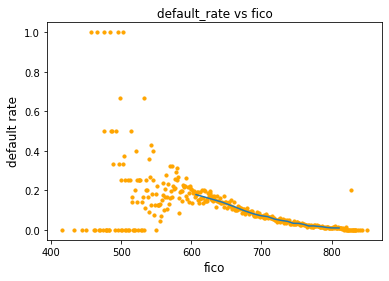

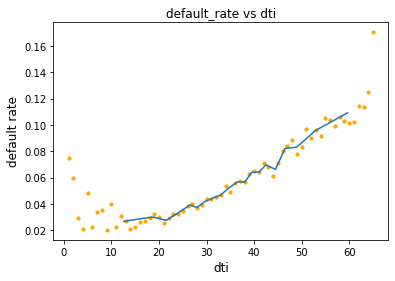

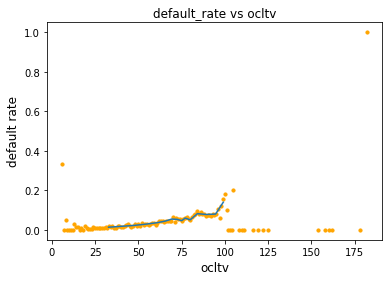

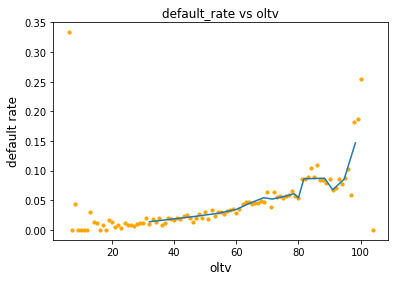

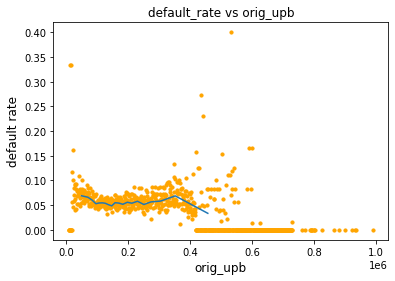

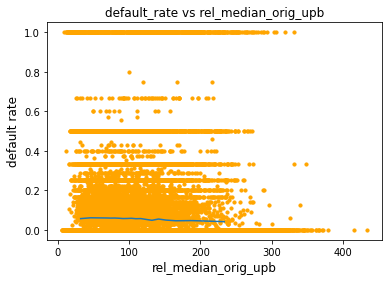

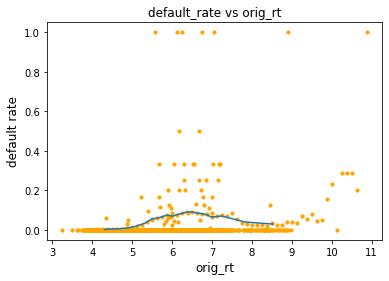

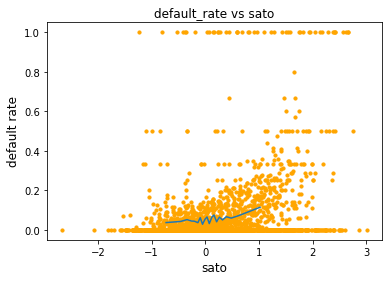

In [100]:
# study relationship of count and continous variables
continous_cols = ['fico', 'dti', 'ocltv', 'oltv', 'orig_upb', 'rel_median_orig_upb', 'orig_rt', 'sato']
for col in continous_cols:
    plt.subplot(111)
    a = df.groupby(pd.qcut(df[col],20,duplicates = 'drop'))[[col, 'd90_flag']].mean()
    plt.plot(a[col],a['d90_flag'])
    
    b = df.groupby([col],as_index=False)[['d90_flag']].mean()
    plt.scatter(b[col],b['d90_flag'],color='orange', s=10)
    #plt.savefig("figs/bivariate_analysis/count_vs_" + col + ".png")
    plt.title("default_rate vs " + col)
    plt.xlabel(col, fontsize =12)
    plt.ylabel('default rate',fontsize =12)
    plt.show()
    #plt.plot(grouped_df.index, grouped_df.values)

<a id="bi-cate"></a>
#### categorial variables

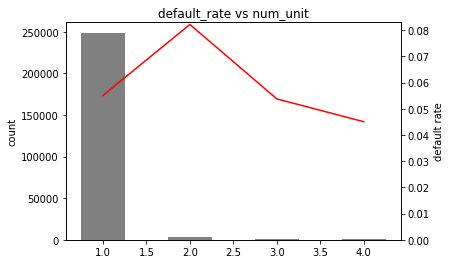

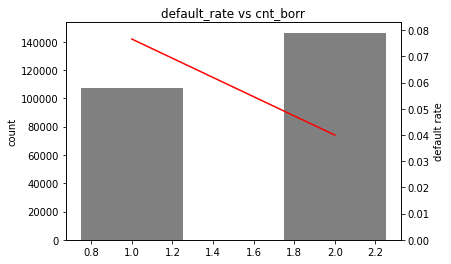

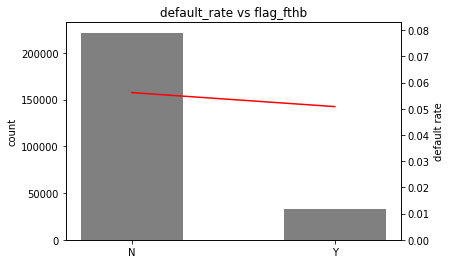

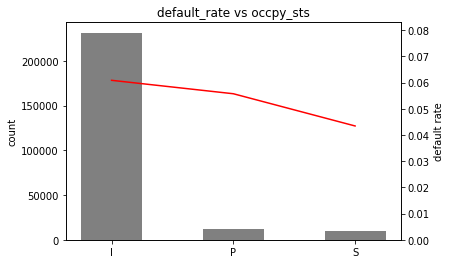

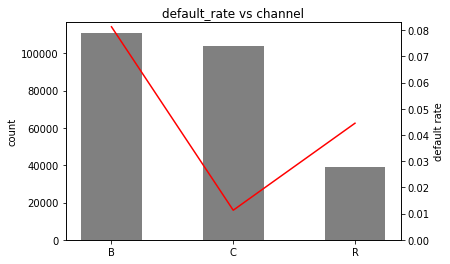

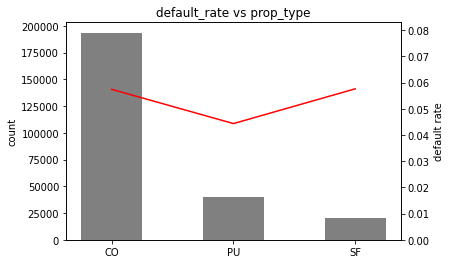

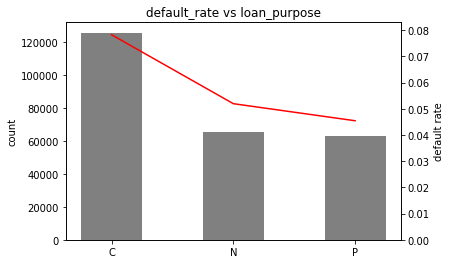

In [142]:
# study relationship of default rate and categorical variables
categorical_columns.remove('d90_flag') 

for col in categorical_columns:
    fig = plt.figure()
    
    ax1 = fig.add_subplot(111)
    d = df[col].value_counts()
    ax1.bar(d.index,d, color = 'grey', width = 0.5)
    ax1.set_ylabel('count')
    
    ax2 = ax1.twinx()
    c = df.groupby([col],as_index=False)[['d90_flag']].mean()
    ax2.plot(c[col],c['d90_flag'],color='red')
    ax2.set_ylim([0, 0.083])
    ax2.set_ylabel('default rate')
    
    plt.title("default_rate vs " + col)
    plt.xlabel(col, fontsize =12)

    plt.show()
    #sns.catplot(x=col, y="d90_flag", data=c, legend = True)
    #plt.savefig("figs/bivariate_analysis/count_vs_" + col + ".png")

<a id="corr"></a>
### correlation analysis

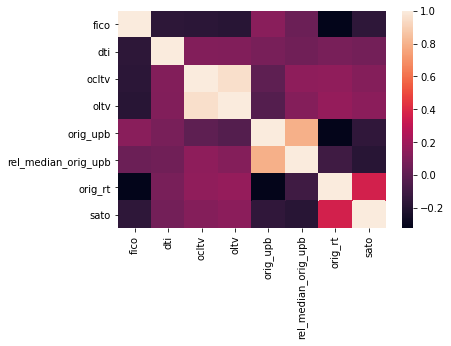

In [143]:
# drop non-numerical variables
continous_cols = ['fico', 'dti', 'ocltv', 'oltv', 'orig_upb', 
                  'rel_median_orig_upb', 'orig_rt', 'sato']

# calculate and plot
corr_matrix = df[continous_cols ].corr()
sns.heatmap(corr_matrix)

we will only use 'fico', 'dti', 'ocltv', 'rel_median_orig_upb', 'sato'